# Weather data 

<p style="font-family:Helvetica Neue , sans-serif;">Reference: https://github.com/ianmcloughlin/2425_computer_infrastructure/blob/main/README.md </p>

***


**Task 1: Create directory structure**

Using the command line, a directory named data was created, with two subdirectories: timestamps and weather. 


```bash
mkdir -p data/timestamps
```
```bash
mkdir -p data/weather
```
-   mkdir = make directory
-   -p = parent folder

***

**Task 2: Timestamps**

In the data/timestamps directory the date command was used to output the current date and time to a file named now.txt. The append operator >> was used to append the data to the end of the file, therefore if rerun the output of the file is not overwritten. (x10)  </p>

```bash
date >> now.txt 

```
-   more now.txt shows the contents of the file on the command line. 



***

**Task 3: Formatting timestamps**

The date command was formatted using the standard date time format. The formatted date time was appended to a new file -formatted.txt 

```bash 
date +"%Y%m%d_%H%M%S" >> formatted.txt 
```

***

**Task 4: Create timestamp files**

A timestamped file was created by: 
```bash
touch 'date +"%Y%m%d_%H%M%S"`
```
-   touch command creates a new file. 
-   embedding the date in backticks allows a timestamped txt file to be created. 

***

**Task 5: Download todays weather data**

In the data/weather directory, the latest weather data for Athenry weather station from Met Eireanns API was obtained using wget and saved as weather.json </p>
```bash
 wget -O weather.json https://prodapi.metweb.ie/observations/athenry/today
```
-   -O give file name, shell redirection 


***

**Task 6: Timestamp the data**

A timestamped file was created using: 
```bash
wget -O `date +"%Y%m%d_%H%M%S"` 
```

***

**Task 7: Write the script**

A bash script called weather.sh was created to automate the process of collecting weather data and saving it as a timestamped file in the data/weather directory. 
```bash
#! /bin/bash 

wget -O data/weather/`date +"%Y%m%d_%H%M%S_athenry.json"` https://prodapi.metweb.ie/observations/athenry/today 
```
-  chmod x allows the files to be executed. 


***

In [1]:
# import dataframe

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
df=pd.read_json('data/weather/20241219_145903_athenry.json')

In [3]:
df.head()

,name,temperature,symbol,weatherDescription,text,windSpeed,windGust,cardinalWindDirection,windDirection,humidity,rainfall,pressure,dayName,date,reportTime
0,Athenry,4,40n,Light rain showers,"""Recent Rain""",17,-,NW,315,84,0.01,1008,Thursday,2024-12-19,00:00
1,Athenry,4,02n,Fair,"""Fair""",15,-,NW,315,84,0.00,1009,Thursday,2024-12-19,01:00
2,Athenry,3,40n,Light rain showers,"""Precipitation""",11,-,W,270,85,0.01,1009,Thursday,2024-12-19,02:00
3,Athenry,3,40n,Light rain showers,"""Recent Precipitation""",9,-,NW,315,88,0.01,1010,Thursday,2024-12-19,03:00
4,Athenry,3,05n,Rain showers,"""Moderate Rain shower""",15,41,NW,315,93,1.90,1011,Thursday,2024-12-19,04:00


In [4]:
df.tail()

,name,temperature,symbol,weatherDescription,text,windSpeed,windGust,cardinalWindDirection,windDirection,humidity,rainfall,pressure,dayName,date,reportTime
10,Athenry,4,02d,Fair,"""Fair""",17,-,NW,315,83,0.0,1017,Thursday,2024-12-19,10:00
11,Athenry,6,02d,Fair,"""Fair""",19,-,NW,315,77,0.0,1019,Thursday,2024-12-19,11:00
12,Athenry,7,02d,Fair,"""Fair""",19,-,W,270,71,0.0,1019,Thursday,2024-12-19,12:00
13,Athenry,8,02d,Fair,"""Fair""",17,-,W,270,72,0.0,1020,Thursday,2024-12-19,13:00
14,Athenry,8,02d,Fair,"""Fair""",9,-,W,270,69,0.0,1020,Thursday,2024-12-19,14:00


In [5]:
# change report time to datetime
df['reportTime']=pd.to_datetime(df['reportTime'])

C:\Users\louis\AppData\Local\Temp\ipykernel_7468\1452091971.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['reportTime']=pd.to_datetime(df['reportTime'])


In [6]:
# set reportTime as index
df.set_index('reportTime',inplace=True)
df

,name,temperature,symbol,weatherDescription,text,windSpeed,windGust,cardinalWindDirection,windDirection,humidity,rainfall,pressure,dayName,date
reportTime,,,,,,,,,,,,,,
2024-12-19 00:00:00,Athenry,4,40n,Light rain showers,"""Recent Rain""",17,-,NW,315,84,0.01,1008,Thursday,2024-12-19
2024-12-19 01:00:00,Athenry,4,02n,Fair,"""Fair""",15,-,NW,315,84,0.00,1009,Thursday,2024-12-19
2024-12-19 02:00:00,Athenry,3,40n,Light rain showers,"""Precipitation""",11,-,W,270,85,0.01,1009,Thursday,2024-12-19
2024-12-19 03:00:00,Athenry,3,40n,Light rain showers,"""Recent Precipitation""",9,-,NW,315,88,0.01,1010,Thursday,2024-12-19
2024-12-19 04:00:00,Athenry,3,05n,Rain showers,"""Moderate Rain shower""",15,41,NW,315,93,1.90,1011,Thursday,2024-12-19
2024-12-19 05:00:00,Athenry,4,46n,Light rain,"""Light rain """,41,-,NW,315,86,0.10,1011,Thursday,2024-12-19
2024-12-19 06:00:00,Athenry,4,02n,Fair,"""Fair""",17,52,W,270,86,0.00,1012,Thursday,2024-12-19
2024-12-19 07:00:00,Athenry,4,02n,Fair,"""Fair""",13,-,NW,315,87,0.00,1014,Thursday,2024-12-19
2024-12-19 08:00:00,Athenry,2,02n,Fair,"""Fair""",4,-,NW,315,92,0.00,1015,Thursday,2024-12-19


In [7]:
# set index to datetime
df.index=pd.to_datetime(df.index)
df

,name,temperature,symbol,weatherDescription,text,windSpeed,windGust,cardinalWindDirection,windDirection,humidity,rainfall,pressure,dayName,date
reportTime,,,,,,,,,,,,,,
2024-12-19 00:00:00,Athenry,4,40n,Light rain showers,"""Recent Rain""",17,-,NW,315,84,0.01,1008,Thursday,2024-12-19
2024-12-19 01:00:00,Athenry,4,02n,Fair,"""Fair""",15,-,NW,315,84,0.00,1009,Thursday,2024-12-19
2024-12-19 02:00:00,Athenry,3,40n,Light rain showers,"""Precipitation""",11,-,W,270,85,0.01,1009,Thursday,2024-12-19
2024-12-19 03:00:00,Athenry,3,40n,Light rain showers,"""Recent Precipitation""",9,-,NW,315,88,0.01,1010,Thursday,2024-12-19
2024-12-19 04:00:00,Athenry,3,05n,Rain showers,"""Moderate Rain shower""",15,41,NW,315,93,1.90,1011,Thursday,2024-12-19
2024-12-19 05:00:00,Athenry,4,46n,Light rain,"""Light rain """,41,-,NW,315,86,0.10,1011,Thursday,2024-12-19
2024-12-19 06:00:00,Athenry,4,02n,Fair,"""Fair""",17,52,W,270,86,0.00,1012,Thursday,2024-12-19
2024-12-19 07:00:00,Athenry,4,02n,Fair,"""Fair""",13,-,NW,315,87,0.00,1014,Thursday,2024-12-19
2024-12-19 08:00:00,Athenry,2,02n,Fair,"""Fair""",4,-,NW,315,92,0.00,1015,Thursday,2024-12-19


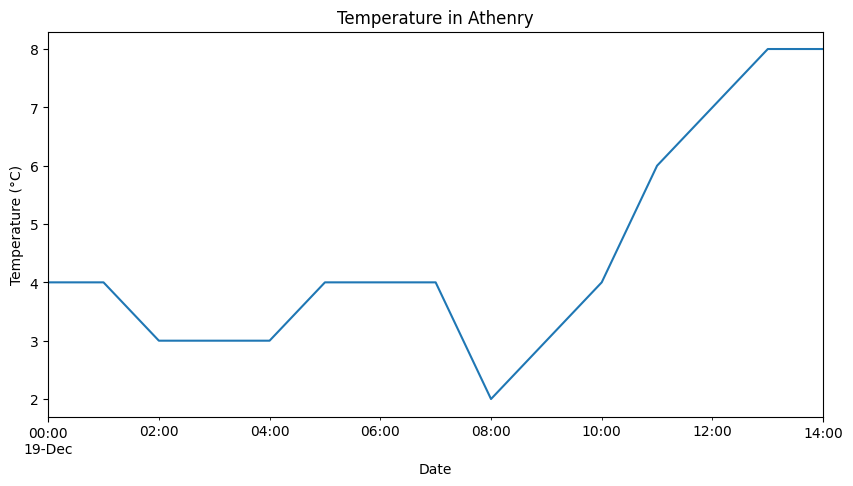

In [12]:
fig, ax = plt.subplots(figsize=(10, 5))
df['temperature'].plot(ax=ax)
ax.set_title('Temperature in Athenry')
ax.set_ylabel('Temperature (°C)')
ax.set_xlabel('Date')
plt.show()

***
### End